In [1]:
# Implement cluster algorithm for monte carlo sampling of Ising configurations
import random
import numpy as np
import matplotlib.pyplot as plt
from IsingMC import*

In [2]:
# H= \sum -J_{ij}S_{i}S_{j}
# Z=exp(-\beta H)

ratio of probabilities of two configurations of selected spin : exp(+/-2J)

first do metropolis and then do cluster, showing difference between autocorrelations


In [52]:

def IsingFlipProb(i,j,J,L):
    
    deltaE=0

    if(spins[(i+1)%L][j]*spins[i][j]>0):
        deltaE+= 2*J        
    
    if(spins[(i-1)%L][j]*spins[i][j]>0):
        deltaE+= 2*J
        
    if(spins[i][(j+1)%L]*spins[i][j]>0):
        deltaE+= 2*J
    
    if(spins[i][(j-1)%L]*spins[i][j]>0):
        deltaE+= 2*J


    return min(1,np.exp(-deltaE))

L=10
lag=L**2
nsteps=18000
eq_time=3*L*L

spins=np.random.choice([-1,1],size=(L,L))

J_arr=np.linspace(0,1,20)

Z_exp=np.zeros(len(J_arr)) # expectation value of the spins

for b,J in enumerate(J_arr):
    
    for n in range(nsteps):
    
        # random site i,j
        i,j=np.random.randint(L,size=2)
        
        if(np.random.rand()<IsingFlipProb(i,j,J,L)):
            spins[i][j]=-1*spins[i][j]
            
        if(n>eq_time and n%lag==0):
            Z_exp[b]+=np.abs(np.average(spins))
            
            

Z_exp=Z_exp/((nsteps-eq_time)//lag)


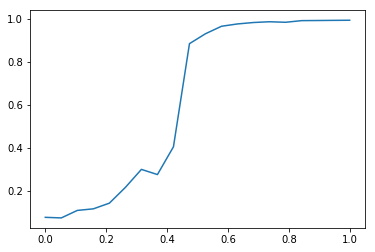

In [53]:
plt.plot(J_arr,Z_exp)

# use a graph based approach to not limit to square lattice

# how to maintain the cluster?

# cluster algorithm - > keep track of which nodes part of cluster, the form a connected component


G[i]=set()

V[i]=node value

#initialize by taking nodes 1,2,L**2

# breadth first 

curr= random node

visited=set()
visited.add(curr)

while(curr):
    next=[]
    for nodes in G[curr]:
        if(nodes not in visited and V[i]V[nodes]<0):
            add to visited
            flip with prob
            
            if(flipped)
                add to next

    curr=next
    


In [74]:



N= 256 # total number of nodes
L=16
spins=np.random.choice([-1,1],size=N)

G={}
# setup square lattice graph

for i in range(L):
    for j in range(L):
        
        n=i*L+j
        G[n]=set()
            
        xp=(i+1)%L
        xm=(i-1)%L
        yp=(j+1)%L
        ym=(j-1)%L

        G[n]=set([xp*L+j,xm*L+j,i*L+yp,i*L+ym])
        



{1, 10, 90, 9}


In [77]:

def p_add(J):

    return min(1,1-np.exp(-2*J))

L=16
N=L**2
lag=L
nsteps=5000
eq_time=3*L*L

spins=np.random.choice([-1,1],size=N)

J_arr=np.linspace(0,2,10)

Z_exp=np.zeros(len(J_arr)) # expectation value of the spins

for b,J in enumerate(J_arr):
    print("nu",b)
    for n in range(nsteps):
    
        # random site i
        i=np.random.randint(N)
        visited=set()
        
        curr_nodes=[i]
        visited.add(i)
        #flip 1st site with the probability 1
        spins[i]=-1*spins[i]
        
        
        while(len(curr_nodes)>0):
            #print("curr nodes",curr_nodes)
            next_nodes=[]

            for node in curr_nodes:
                for neighbor in G[node]:
                    if((spins[neighbor]!=spins[i]) and (neighbor not in visited)):
                        visited.add(neighbor)
                        
                        if(np.random.rand()<p_add(J)):
                            spins[neighbor]=-1*spins[neighbor]
                            next_nodes.append(neighbor)
                            
            curr_nodes=next_nodes
            
        if(n>eq_time and n%lag==0):
            Z_exp[b]+=np.abs(np.average(spins))
            
print("Z_exp",Z_exp)            
Z_exp=Z_exp/((nsteps-eq_time)//lag)


nu 0
nu 1
nu 2
nu 3
nu 4
nu 5
nu 6
nu 7
nu 8
nu 9
Z_exp [ 15.796875   19.8046875  40.9296875 110.234375  183.9296875 211.9453125
 229.1953125 241.4453125 249.46875   253.875    ]


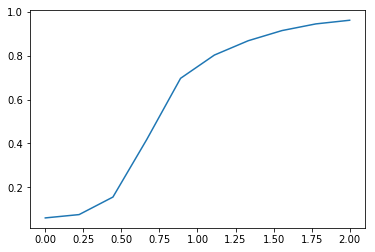

In [78]:
plt.plot(J_arr,Z_exp)


In [5]:
# is calling function faster or accessing p_arr

import time
import numpy as np

J_arr=np.linspace(0,1,20)
p_arr=[1-np.exp(-2*J) for J in J_arr]

def p_call(J):
    return 1-np.exp(-2*J)

t0=time.time()
for J in J_arr:
    for i in range(10000):
        if(np.random.rand()<p_call(J)):
            continue
            
print("function call time",time.time()-t0)

t0=time.time()
for j,J in enumerate(J_arr):
    for i in range(10000):
        if(np.random.rand()<p_arr[j]):
            continue
            
print("array access time time",time.time()-t0)


function call time 2.0108611583709717
array access time time 0.4106748104095459


In [12]:
Nsites=100
Nsteps=10000
lag=100
eq_steps=100

temp=np.linspace(0,2,10)

model=IsingMC(Nsites=Nsites,temp=temp,Nsteps=Nsteps,eq_steps=eq_steps,lag=lag,full_Zexp=False,graph=None)
print("here",model.Zexp)
num_workers=7

model.run(algo='metropolis',n_workers=num_workers)
print("shape of you",model.Zexp.shape)
print("expectation value", model.Zexp,model.Nsites,model.p_arr)


here [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape of you (10,)
expectation value [0.06222222 0.23111111 0.16       0.24222222 0.09555556 0.35111111
 0.35333333 0.18222222 0.18222222 0.18222222] 100 [0.0, 0.3588196115700454, 0.5888877094928125, 0.7364028618842733, 0.8309866845939339, 0.8916319767781041, 0.9305165487771985, 0.9554485737555103, 0.9714344992154497, 0.9816843611112658]


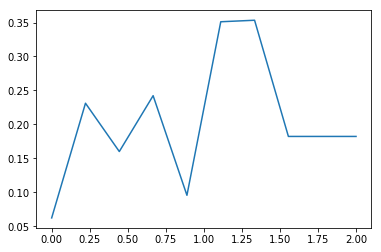

In [13]:
plt.plot(model.temp,model.Zexp)